In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers

In [ ]:
data = tf.keras.datasets.cifar10
(train_image, train_label), (test_image, test_label) = data.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
train_image.shape

(50000, 32, 32, 3)

In [ ]:
train_label.shape

(50000, 1)

In [ ]:
print(test_image.shape)
print(test_label.shape)

(10000, 32, 32, 3)
(10000, 1)


In [ ]:
train_image, test_image = train_image / 255.0 , test_image / 255.0

In [ ]:
#For verification data, please look at CIFAR-10 Keras (1st Version and 2nd Version)

In [ ]:
#Create Model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu", padding="same", input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

history = model.fit(train_image,train_label, epochs=10, validation_data=(test_image,test_label))

Epoch 1/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.5685 - accuracy: 0.4146 - val_loss: 1.2917 - val_accuracy: 0.5294
Epoch 2/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.1822 - accuracy: 0.5725 - val_loss: 1.0856 - val_accuracy: 0.6107
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0217 - accuracy: 0.6361 - val_loss: 1.0098 - val_accuracy: 0.6387
Epoch 4/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.9177 - accuracy: 0.6738 - val_loss: 0.9401 - val_accuracy: 0.6701
Epoch 5/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8385 - accuracy: 0.7064 - val_loss: 0.8787 - val_accuracy: 0.6947
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.7751 - accuracy: 0.7278 - val_loss: 0.8917 - val_accuracy: 0.6988
Epoch 7/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.7304 - accuracy: 0.7460 - val_loss: 0.8835 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


313/313 - 5s - loss: 0.8372 - accuracy: 0.7237
0.7236999869346619


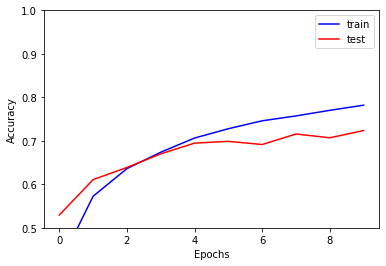

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="blue", label="train")
plt.plot(history.history["val_accuracy"], color="red", label="test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.5,1])
plt.legend(loc="top right")

test_loss, test_acc = model.evaluate(test_image,test_label,verbose=2)
print(test_acc)